  ***BUSINESS UNDERSTANDING***
  
  >A telecommunication company aims at reducing the amount of money spent because of customers who don't stick around very long.
  >The analysis to be conducted aim at identifying patterns and factors that may lead to customer churn.
  >The main goals of the model is to improve subscriber satisfaction,through deriving insights into customer behavior and preferences.My analysis will inform offering of better services that meet the subscriber needs and enhace loyalty among the existing subscribers and additionally, attract new subscribers in the competitive telecommunications industry.

***DATA UNDERSTANDING***
> The dataset contains a record of customers and comprehensive subscriber-related attributes associated to the services offered by the company.This dataset allows us to perform anlysis and identify patterns, major factors that lead to customer churns.
>Addittionaly, the dataset will be useful in creating a model that will improve customer experience and improve customer retention.
> Find attached a detailed elaboration of what each column entails.

***OBJECTIVES***

>1. Identify the attributes and services that have a higher likelihood of leading a client to churn the company
>2. Determine the possible measures that can be implemented to ensure that the clients dont churn the company
>3. Develop a model that identifies the customers population that is likely to be at risk of churning and develop measures to mitigate the churning

****IMPORTS****
    

In [174]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


***LOADING THE DATA SET***

In [175]:
data=pd.read_csv("syriateldataset.csv")
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


*** PERFORMING EDA BEFORE SPLITTING ***

In [176]:
data.shape #Checking the number of rows and columns in the dataset

(3333, 21)

In [177]:
data.head(5) #First five rows of the dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [178]:
print(data.shape ) #Checking the number of rows and columns in the dataset
print('\n')
print(data.info())# Checking the general summary of the data

(3333, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       333

In [179]:
data.describe() #Checking the descriptive statistics of the data DataFrame

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [180]:
data.isna().sum() # Checking if the columns have any missing values and the count.

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [181]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [182]:
print(data['area code'].unique())
print("The count of unique area codes are:")
print(data['area code'].nunique())

[415 408 510]
The count of unique area codes are:
3


In [183]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

***DATA PREPROCESSING***
>1. We have established that the data we have is relatively clean
>2. We are going to change the non numeric columns into numeric 
>3. Then, we are going to drop the columns we least need in our analysis


In [184]:
#Creating a copy of the data
pre_data=data.copy()

pre_data['international_plan'] = pre_data['international plan'].apply(lambda x: 0 if x=='no' else 1)
pre_data['voice_mail_plan']=pre_data['voice mail plan'].map({'yes':1, 'no':0})
pre_data['churn'] = pre_data['churn'].apply(lambda x : 1 if x else 0)

In [185]:
#Using label encoding to change the state column into numeric:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pre_data['state_num'] = label_encoder.fit_transform(pre_data['state'])
pre_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan,voice_mail_plan,state_num
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,0,1,16
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,0,1,35
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,0,0,31
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,1,0,35
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,1,0,36


In [186]:
pre_data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
international_plan          int64
voice_mail_plan             int64
state_num                   int32
dtype: object

In [187]:
#Dropping the categorical data type columns
# We shall drop the phone number column too since we wont use it for the analysis

cat_columns=['phone number','international plan','voice mail plan','churn']
pre_data.drop(cat_columns, axis=1)

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international_plan,voice_mail_plan,state_num
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,16
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,35
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,31
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,35
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1,3
3329,WV,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,49
3330,RI,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,39
3331,CT,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1,0,6


**VISUALIZATIONS**

>****Univariate, bivariate and multivariate analysis****

The distribution of our target variable:
False    2850
True      483
Name: churn, dtype: int64
Visual representation of the churn distribution:


C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

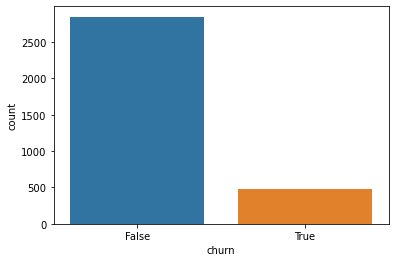

In [188]:
print("The distribution of our target variable:")
print(data['churn'].value_counts())
print("Visual representation of the churn distribution:")
sns.countplot(data['churn']) 

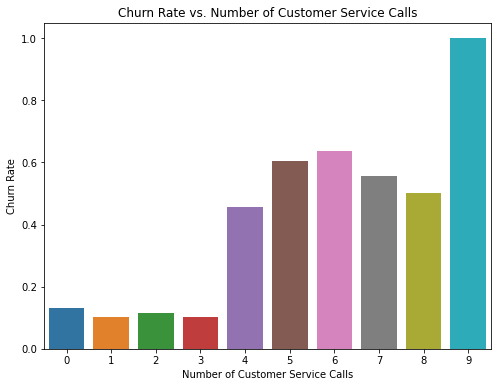

In [189]:
#A bar plot to examine the relationship between customer service calls and the churn rate
plt.figure(figsize=(8, 6))
sns.barplot(x='customer service calls', y='churn', data=pre_data, ci=None)

plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Number of Customer Service Calls')

plt.show()

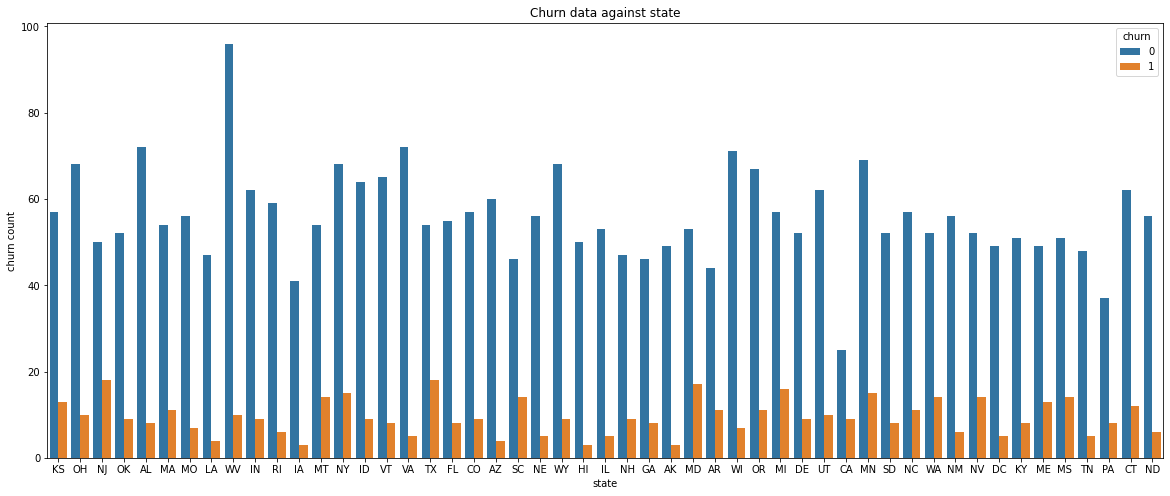

In [190]:
#Churn data against state
plt.figure(1, figsize=(20,8))
sns.countplot(x='state',data= pre_data, hue= 'churn')
plt.title("Churn data against state")
plt.ylabel('churn count');

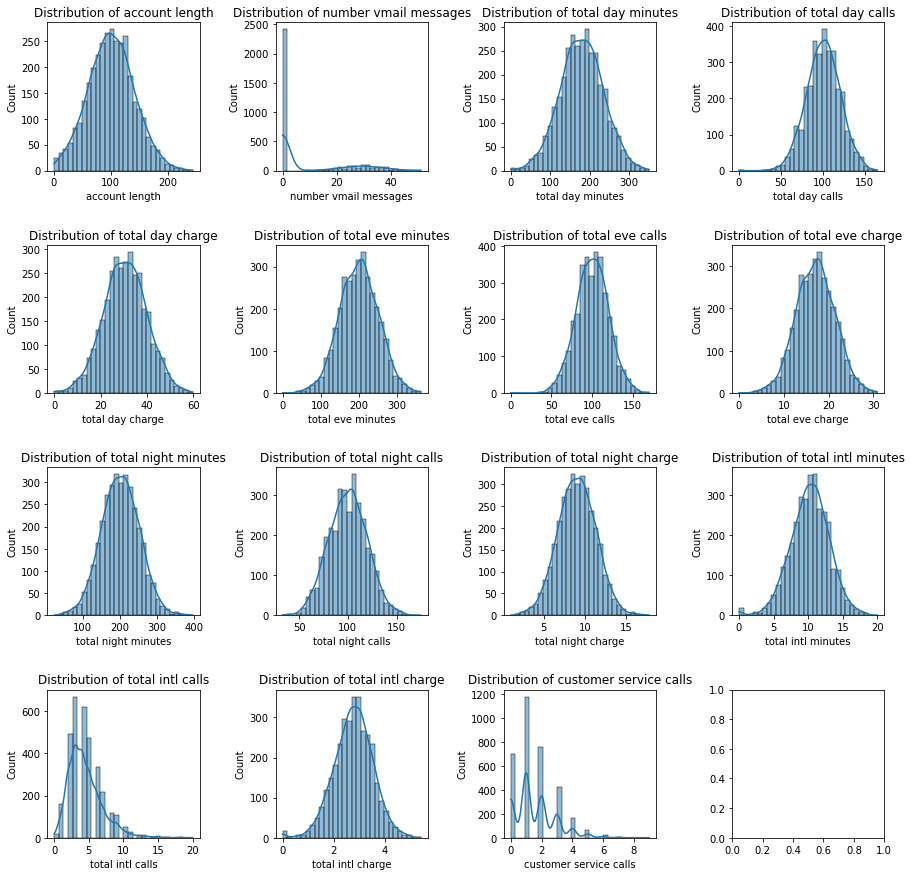

In [213]:
## Creating sub plots for visual presentation of distribution of attributes

# Selecting numeric features
num_features = data[['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                        'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                        'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                        'total intl calls', 'total intl charge', 'customer service calls']]


num_subplots = 4

# Calculate the number of rows needed based on the number of attributes
num_rows = len(num_features.columns) // num_subplots
if len(num_features.columns) % num_subplots != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_subplots, figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Flatten the axes to iterate through them
axes = axes.ravel()

# Create distribution plots for each numeric attribute
for i, column in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=column, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Display the plots
plt.show()


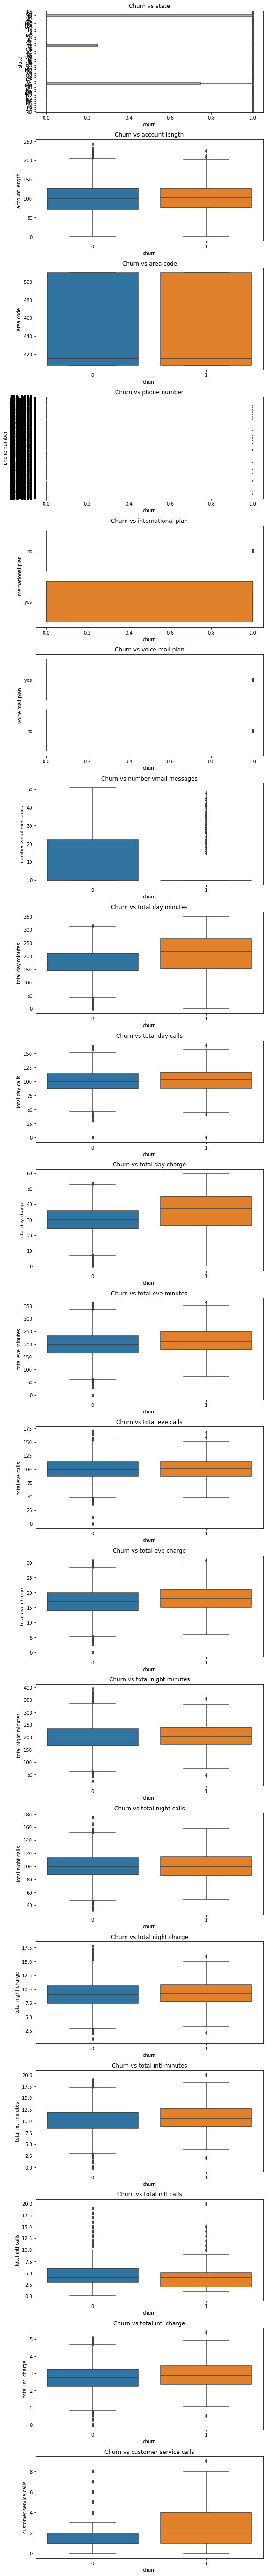

In [191]:
#Checking for outliers in the data using boxplots
plt.figure(1, figsize= (8,80))
i=0
for col in data:
    if col == 'churn':
        continue
    i += 1
    plt.subplot(len(data.columns),1,i)
    sns.boxplot(y =col,x = 'churn' , data=pre_data)
    plt.ylabel(col)
    plt.xlabel('churn')
    plt.title('Churn vs {}'.format(col))
    plt.tight_layout();

#### Preparing the data for splitting.
#### I will check the features most most relevant with the analysis
#### Drop some columns
#### Determine the target variable and the independent variables

In [193]:
#Identifying my feature columns
feature_columns=pre_data.drop(['state','area code','phone number','international plan','voice mail plan','state_num','churn'],axis=1)
feature_columns.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international_plan,voice_mail_plan
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [194]:
Y= pre_data["churn"] #Target variable
X= feature_columns #Independent variables

***SPLITTING THE DATASET TO TRAIN AND TEST DATA***


In [225]:
from sklearn.model_selection import train_test_split
#training the model with 75% of the data and test it with 25% of the remaining data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Addressing imbalance in  the target variable data

In [226]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


over_sampling.fit_resample(X_train, Y_train)



(      account length  number vmail messages  total day minutes  \
 0                 45                      0          78.200000   
 1                115                      0         195.900000   
 2                121                     31         237.100000   
 3                180                      0         143.300000   
 4                112                      0         206.200000   
 ...              ...                    ...                ...   
 4277             113                      0         226.309297   
 4278              79                      0         244.096254   
 4279             131                      9         221.970814   
 4280             117                     31         157.804657   
 4281              70                      0          95.687461   
 
       total day calls  total day charge  total eve minutes  total eve calls  \
 0                 127         13.290000         253.400000              108   
 1                 111         33.

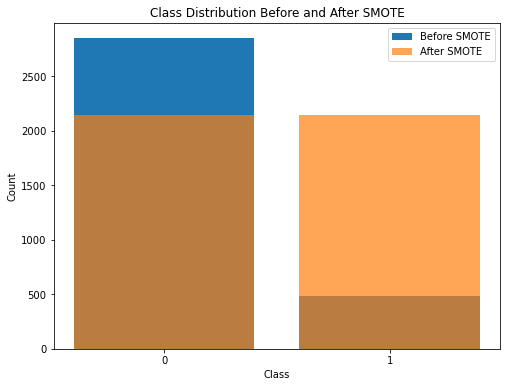

Class Distribution Before SMOTE:
0    2850
1     483
Name: churn, dtype: int64

Class Distribution After SMOTE:
1    2141
0    2141
Name: churn, dtype: int64


In [227]:
# Count the class distribution before SMOTE
class_distribution_before = Y.value_counts()

# Count the class distribution after SMOTE
class_distribution_after = pd.Series(Y_train_resampled).value_counts()

#bar plot to visually compare the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_distribution_before.index, class_distribution_before.values, label='Before SMOTE')
plt.bar(class_distribution_after.index, class_distribution_after.values, label='After SMOTE', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before and After SMOTE')
plt.xticks(class_distribution_before.index)
plt.legend()
plt.show()

print("Class Distribution Before SMOTE:")
print(class_distribution_before)
print("\nClass Distribution After SMOTE:")
print(class_distribution_after)


### Scaling the data

In [228]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


### Performing classification using logistic regression

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Instantiating the linear regression model
logreg = LogisticRegression(random_state=42)
#Fitting the training model
logreg.fit(X_train_scaled, Y_train_resampled)


y_predicted_log =logreg.predict(X_test_scaled)
print(classification_report(Y_test,y_predicted_log))


              precision    recall  f1-score   support

           0       0.94      0.73      0.82       709
           1       0.33      0.74      0.45       125

    accuracy                           0.73       834
   macro avg       0.63      0.74      0.64       834
weighted avg       0.85      0.73      0.77       834



### Classification using decision trees

In [200]:
from sklearn.tree import DecisionTreeClassifier
dst_model = DecisionTreeClassifier()
dst_model.fit(X_train_scaled,Y_train_resampled)

y_predicted_dec = dst_model.predict(X_test_scaled)

print(classification_report(Y_test,y_predicted_dec))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       709
           1       0.44      0.70      0.54       125

    accuracy                           0.82       834
   macro avg       0.69      0.77      0.72       834
weighted avg       0.87      0.82      0.84       834



### Classification using KNN classifier

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(12)

knn.fit(X_train_scaled,Y_train_resampled)
y_predicted_knn = knn.predict(X_test_scaled)

#knn.score(X_test,Y_test)
print(classification_report(Y_test,y_predicted_knn))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       709
           1       0.45      0.77      0.56       125

    accuracy                           0.82       834
   macro avg       0.70      0.80      0.73       834
weighted avg       0.88      0.82      0.84       834



### From the classification reports of the above classifiers, the models have the accuracy scores as shown:

In [210]:
print(f"Logistic Regression Classifier ",logreg.score(X_test_scaled,Y_test))
print(f"Decision Tree Classifier",dst_model.score(X_test_scaled,Y_test))
print(f'K Nearest Neighbor classifier:',knn.score(X_test_scaled,Y_test))

Logistic Regression Classifier  0.7314148681055156
Decision Tree Classifier 0.8225419664268585
K Nearest Neighbor classifier: 0.8225419664268585


## Confusion matrices for the classifiers

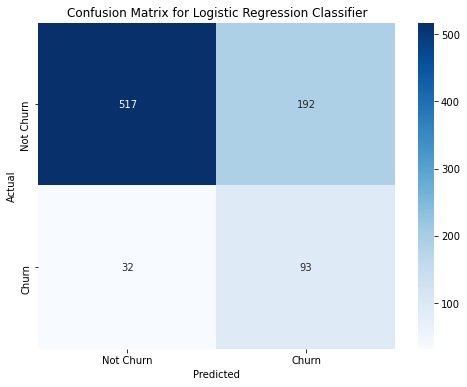

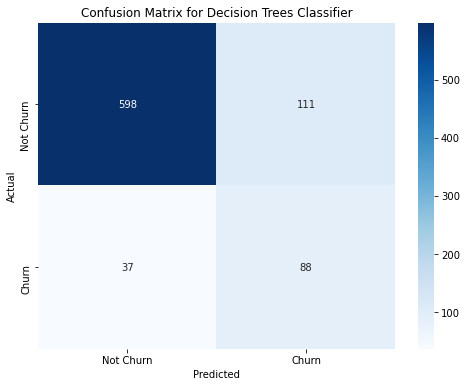

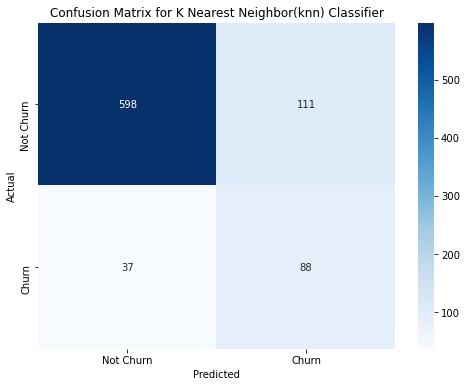

In [203]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, y_predicted_log)

# Plot the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


conf_matrix = confusion_matrix(Y_test, y_predicted_dec)

# Plot the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Classifier')
plt.show()

conf_matrix = confusion_matrix(Y_test, y_predicted_dec)

# Plot the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K Nearest Neighbor(knn) Classifier')
plt.show()

## From the above analysis, my best Classification model is the Decision Tree Classifier.
### I am going to apply hyper parameter tuning to the model
### The hyperparameter tuning will optimize the models performance by :
### a) addressing overfitting and underfitting(Balancing the Bias-variance trade offs)
### b) Grid search method that searches for the best hyperparameters for the model



In [208]:
from sklearn.model_selection import GridSearchCV

dst_model_optimal = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=dst_model_optimal, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train_scaled, Y_train_resampled)

# Get the best parameters found by the grid search
optimal_params = grid_search.best_params_

# Instantiate a new Decision Tree model with the best parameters
best_dst_model = DecisionTreeClassifier(**optimal_params)

# Fit the model to the training data
best_dst_model.fit(X_train_scaled, Y_train_resampled)

# Making predictions with the tuned model
y_predicted_dec_optimal = best_dst_model.predict(X_test_scaled)

# Classification report
print(classification_report(Y_test, y_predicted_dec_optimal))


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       709
           1       0.44      0.66      0.53       125

    accuracy                           0.82       834
   macro avg       0.69      0.76      0.71       834
weighted avg       0.86      0.82      0.84       834



In [209]:
print(f"Initial model accuracy",dst_model.score(X_test_scaled,Y_test))
print(f"Optimized Decision Tree accuracy",best_dst_model.score(X_test_scaled,Y_test))

Initial model accuracy 0.8225419664268585
Optimized Decision Tree accuracy 0.8237410071942446


### Gradient boost model and to investigate attributes with a higher likelihood of leading to customer churn

In [248]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)#Instantiating the model
gb_model.fit(X_train, Y_train)#Fitting the model

gb_feature_importances = gb_model.feature_importances_#Getting the feature importance from the model

#Create a DataFrame to associate features with their importance scores
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    
    'GradientBoosting Importance': gb_feature_importances
})

importances_df = importances_df.sort_values(by='GradientBoosting Importance', ascending=False)#Sort the DataFrame by importance scores
print("Feature Importances:")
print(importances_df)

Feature Importances:
                   Feature  GradientBoosting Importance
2        total day minutes                     0.187878
14  customer service calls                     0.172546
15      international_plan                     0.132608
4         total day charge                     0.091586
5        total eve minutes                     0.077800
11      total intl minutes                     0.075338
12        total intl calls                     0.073672
7         total eve charge                     0.049777
1    number vmail messages                     0.048831
16         voice_mail_plan                     0.034547
13       total intl charge                     0.014667
8      total night minutes                     0.013115
10      total night charge                     0.013001
3          total day calls                     0.005652
6          total eve calls                     0.005304
9        total night calls                     0.002376
0           account length 

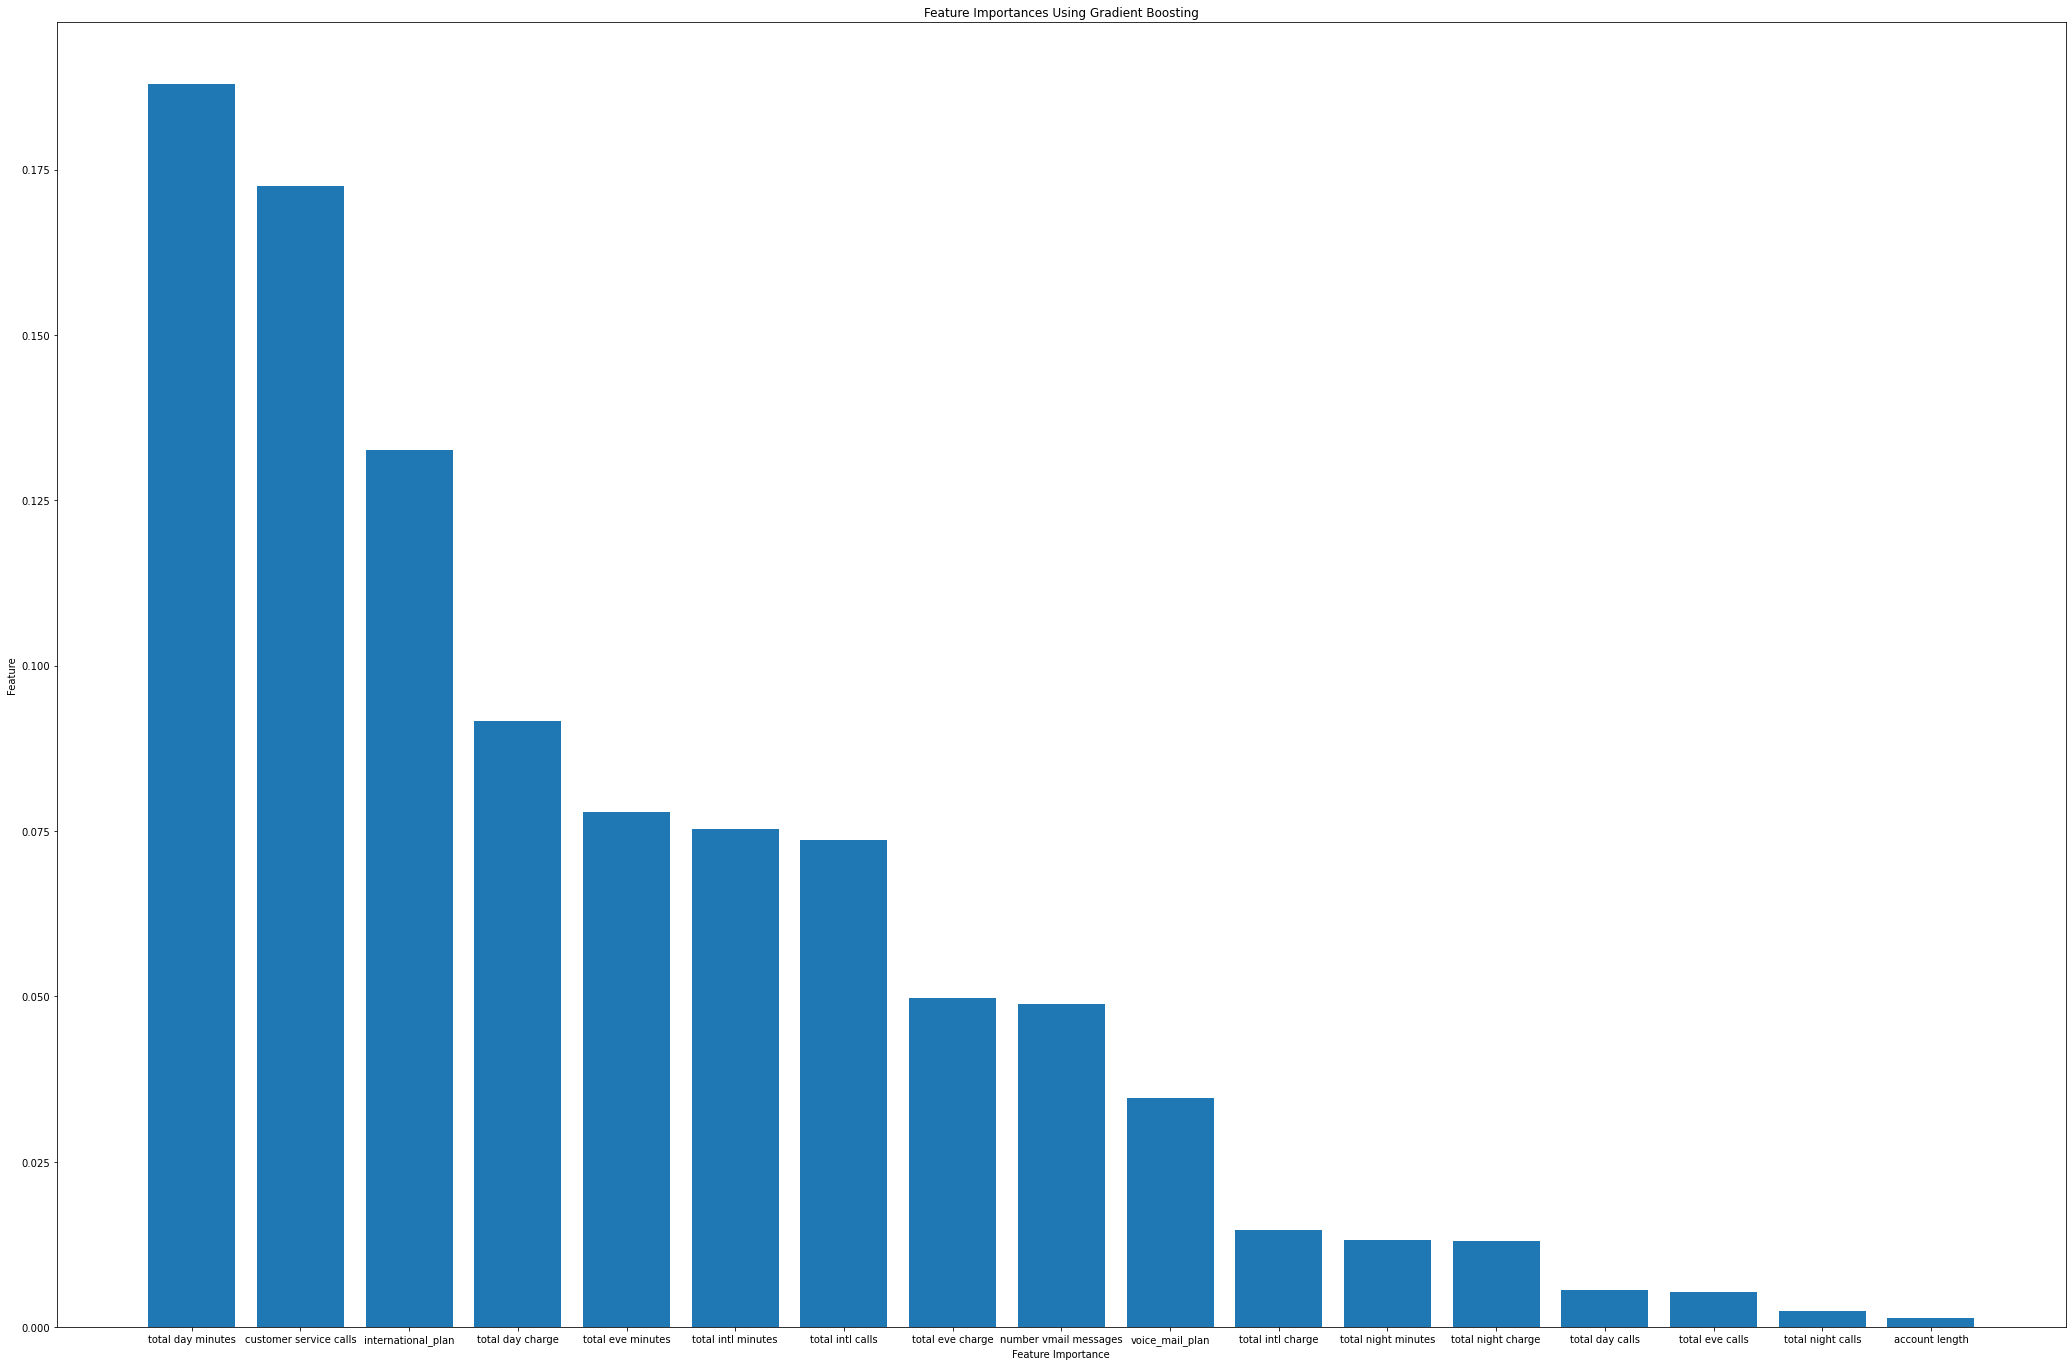

In [242]:
#Visualizing the above gradient boosting analysis using a bar chart 
plt.figure(figsize=(36, 24))
plt.bar(importances_df['Feature'], importances_df['GradientBoosting Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances Using Gradient Boosting')
plt.show()

### Using a random forest classifier:

Feature Importances:
                   Feature  RandomForest importances
2        total day minutes                  0.143396
4         total day charge                  0.130487
14  customer service calls                  0.122484
15      international_plan                  0.085068
5        total eve minutes                  0.070427
7         total eve charge                  0.063900
12        total intl calls                  0.047469
11      total intl minutes                  0.043858
13       total intl charge                  0.041439
8      total night minutes                  0.040999
10      total night charge                  0.039638
9        total night calls                  0.031064
3          total day calls                  0.030944
1    number vmail messages                  0.030561
0           account length                  0.030154
6          total eve calls                  0.029686
16         voice_mail_plan                  0.018425


Bar graph visualization

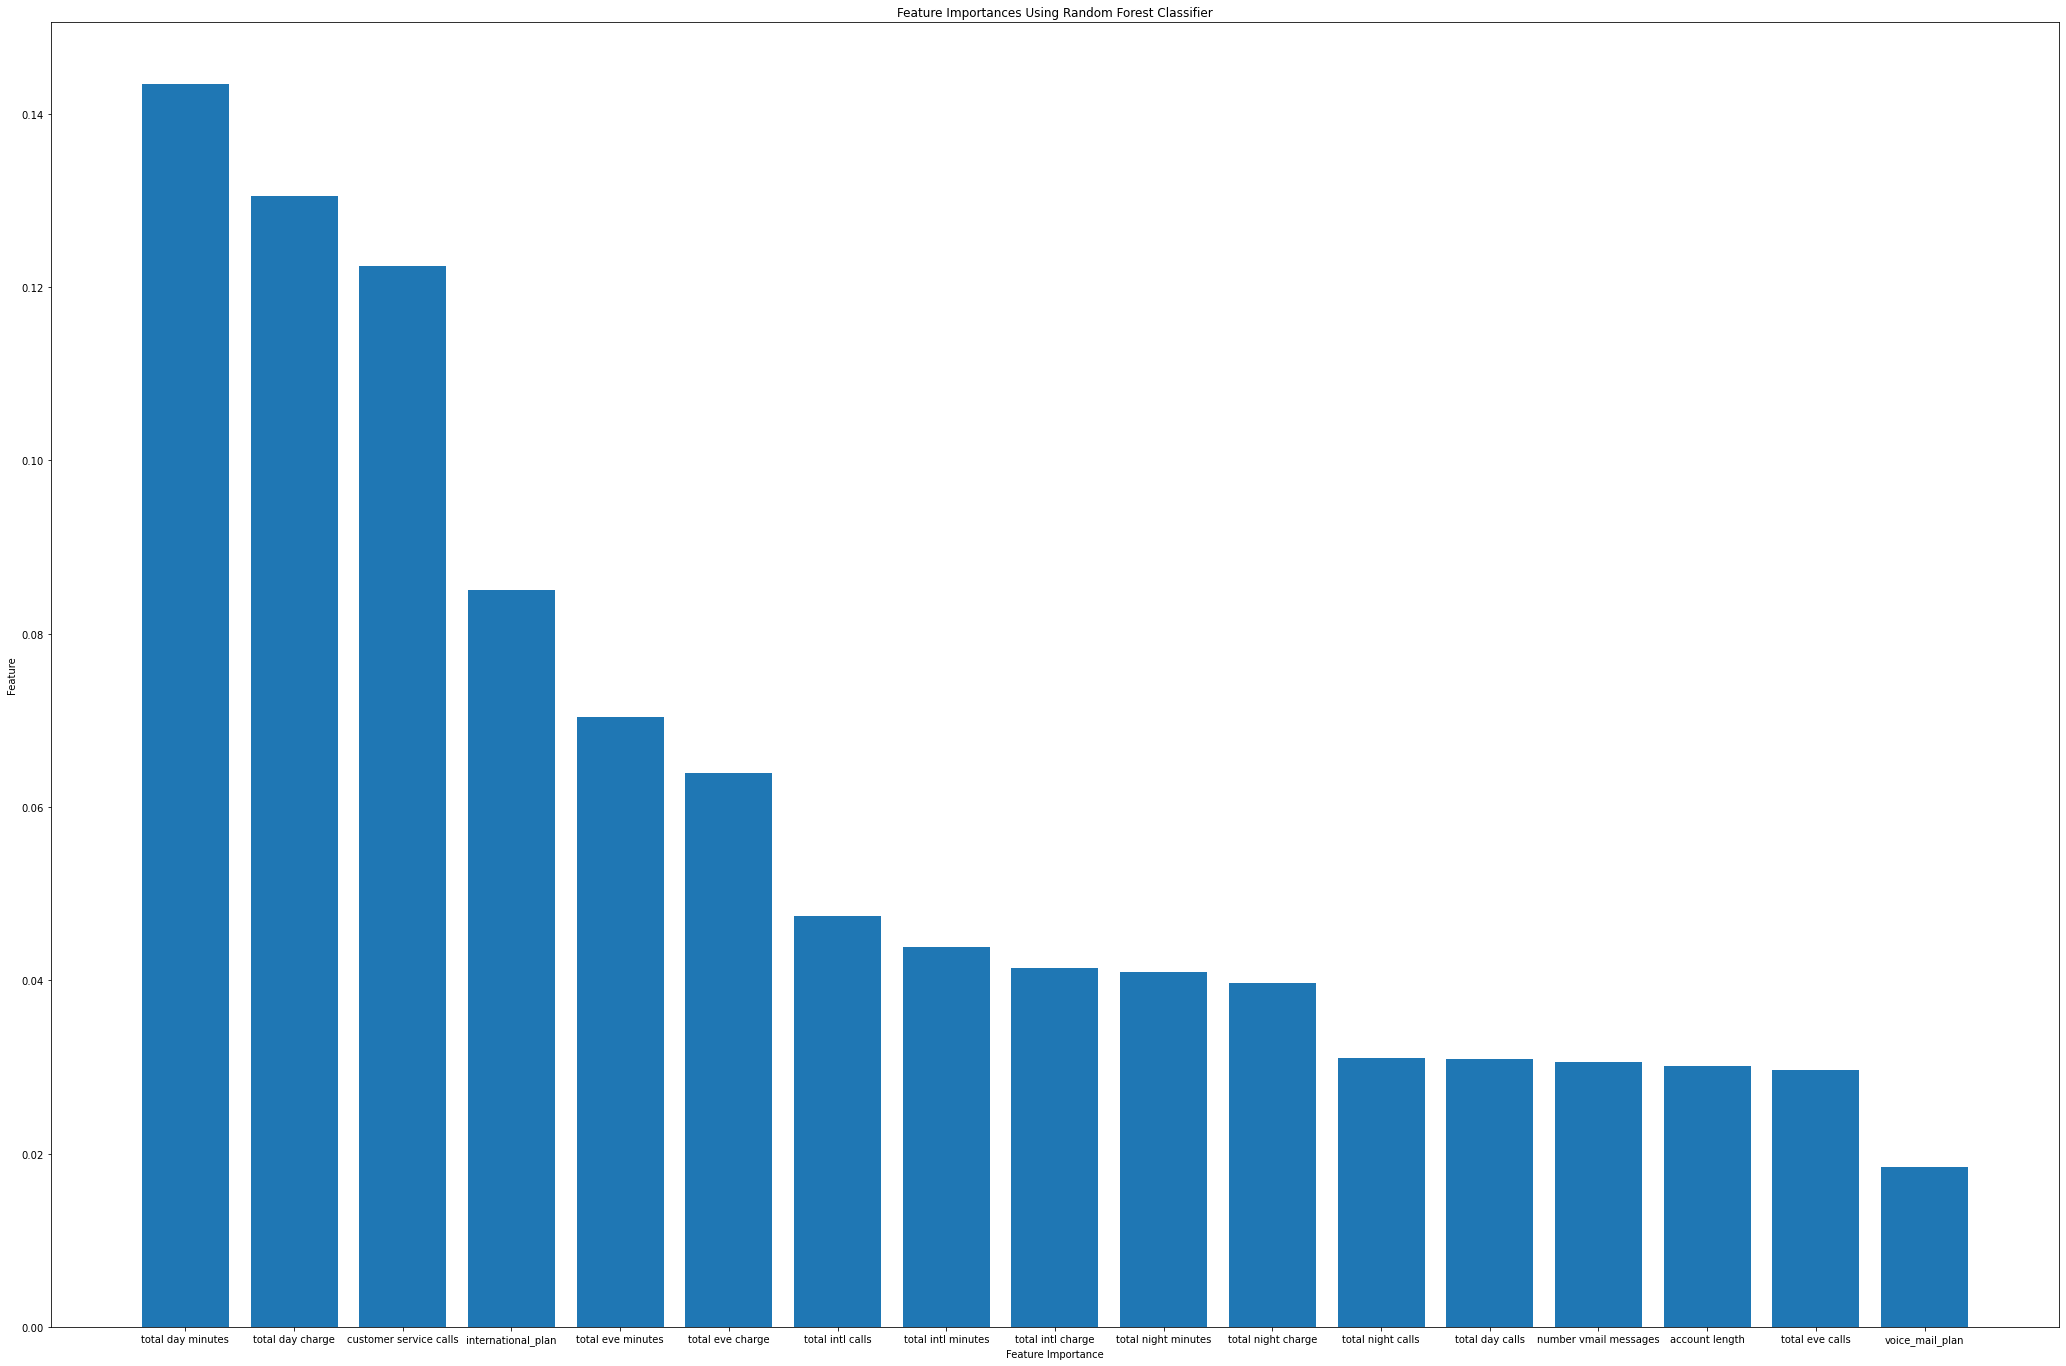

In [249]:
from sklearn.ensemble import RandomForestClassifier
#Instantiating the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Fitting the model
rf_model.fit(X_train, Y_train)
#Getting the feature importance from the model
rf_feature_importances = rf_model.feature_importances_
#Create a DataFrame to associate features with their importance scores
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    
    'RandomForest importances': rf_feature_importances
})
#Sort the DataFrame by importance scores
importances_df = importances_df.sort_values(by='RandomForest importances', ascending=False)

print("Feature Importances:")
print(importances_df)

#Printing a bar graph for visual representation
print("\n")
print("Bar graph visualization:")
plt.figure(figsize=(36, 24))
plt.bar(importances_df['Feature'], importances_df['RandomForest importances'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances Using Random Forest Classifier')
plt.show()


## CONCLUSIONS
### The top five services  may influence the decision of a subscriber to churn or not churn the company are:
>1.total day minutes                 
>2.total day charge                  
>3.customer service calls            
>4.international_plan                
>5.total eve minutes                 

### The following measures can be implemented to ensure that the clients dont churn the company
>1.Offer affordable subscription plans for day calling:Total day minutes and charges have the highest importance, offering an affordable plan will retain the existing subscribers as well as attract more. Hence giving the company an edge in the competitive telecom industry.

>2.Improve customer experience. Customer service calls have a relatively high importance. Addressing and resolving subscribers' issues may have a significant effect on whether or not the subscribers churn the service provider.

>3.Offering pesonalized plans for different subscribers categories eg a commpetive and affordable plan for the international plan subscribers.

>4.Continuous market analysis and modelling: Keeping up with the market trends and developing models that will predict the likelihood of subscribers churning the service provider is paramount and should be conducted continuously. This will give the company a competitive edge over competitors.


## RECOMMENDATIONS
#### Understanding Subscriber needs:
>Subscriber needs are influenced by various factors, including demographics, age, preferences, and emerging trends. To enhance subscriber satisfaction and retention, conduct in-depth research to understand their unique needs. This insight can inform the development of tailored subscription plans that address clients' specific requirements, ultimately improving the quality of service. the subscription plans curated by the company to cater for clients needs and as a result, improve the qUality of service. 
#### Continuous Modelling and market trends analysis.
>To maintain competitiveness, it's essential to continuously analyze market trends and predict subscriber behavior. Regularly monitor shifts in the industry and consumer preferences. Develop predictive models that assess the likelihood of subscriber churn. Leverage on these insights to proactively address customer needs and expectations. Staying ahead of the curve in understanding and fulfilling customer requirements will set the company apart from competitors.